# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Yosriko Rahmat Karoni Sabelekake
- **Email:** yosrikosabelekake@gmail.com
- **ID Dicoding:** yosriko

## Menentukan Pertanyaan Bisnis

- Tipe pelanggan apa yang perlu difokuskan untuk meningkatkan penjualan?
- Bagaimana menentukan fokus sales/promosi/ekspansi berdasarkan lokasi geografis pelanggan dan penjual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [2]:
orders = pd.read_csv('/content/dataset/olist_orders_dataset.csv')
reviews = pd.read_csv('/content/dataset/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('/content/dataset/olist_order_items_dataset.csv')
products = pd.read_csv('/content/dataset/olist_products_dataset.csv')
sellers = pd.read_csv('/content/dataset/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/dataset/olist_geolocation_dataset.csv')

### Assessing Data

In [3]:
print("Orders Dataset Structure:")
print(orders.info())
print("\n")

print("Reviews Dataset Structure:")
print(reviews.info())
print("\n")

print("Order Items Dataset Structure:")
print(order_items.info())
print("\n")

print("Products Dataset Structure:")
print(products.info())
print("\n")

print("Sellers Dataset Structure:")
print(sellers.info())
print("\n")

print("Customers Dataset Structure:")
print(customers.info())
print("\n")

print("Geolocation Dataset Structure:")
print(geolocation.info())

Orders Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Reviews Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   -----------

**Insight:**
- Mengetahui kondisi data dan menentukan langkah pembersihan yang diperlukan

### Cleaning Data

In [4]:
orders.dropna(inplace=True)
reviews.dropna(inplace=True)
order_items.dropna(inplace=True)
products.dropna(inplace=True)
sellers.dropna(inplace=True)
customers.dropna(inplace=True)
geolocation.dropna(inplace=True)

**Insight:**
- Menghapus data atau row yang berisikan null values


## Exploratory Data Analysis (EDA)

### Explore ...

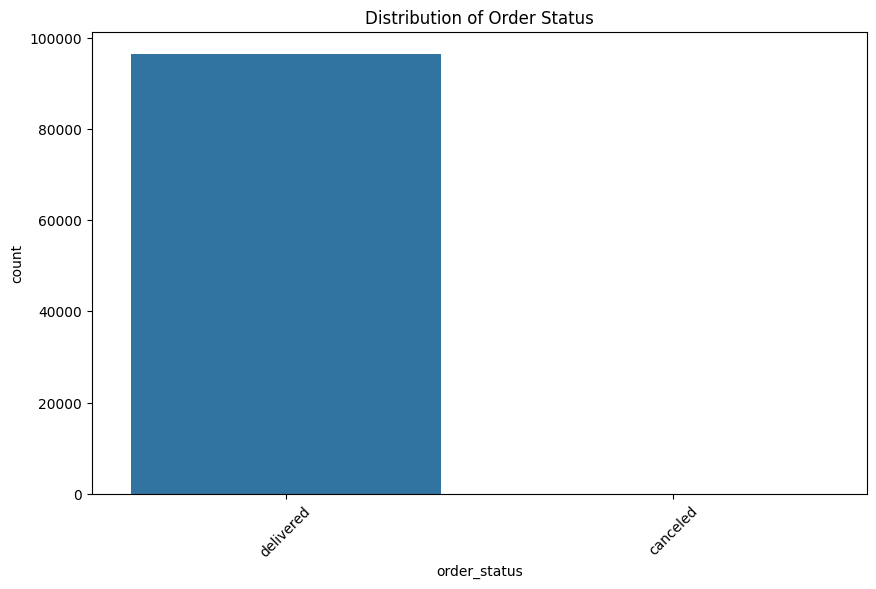

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders, x='order_status')
plt.title('Distribution of Order Status')
plt.xticks(rotation=45)
plt.show()

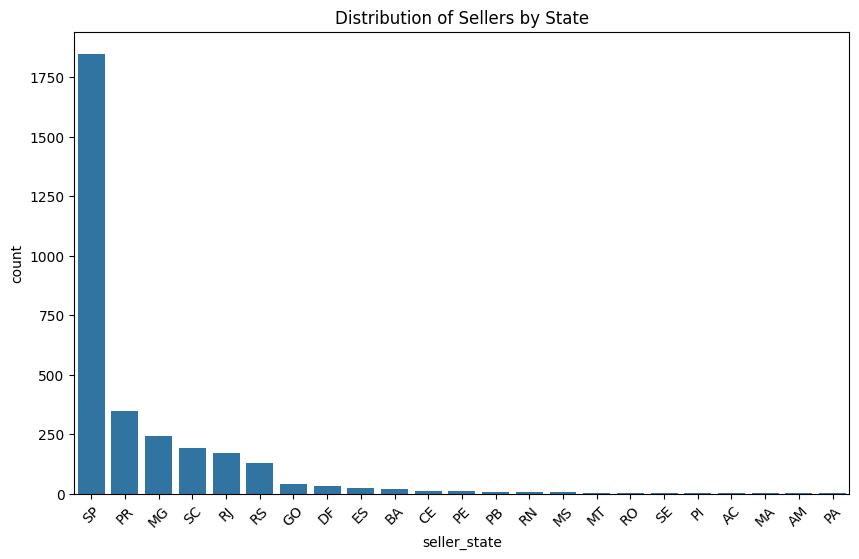

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sellers, x='seller_state', order=sellers['seller_state'].value_counts().index)
plt.title('Distribution of Sellers by State')
plt.xticks(rotation=45)
plt.show()

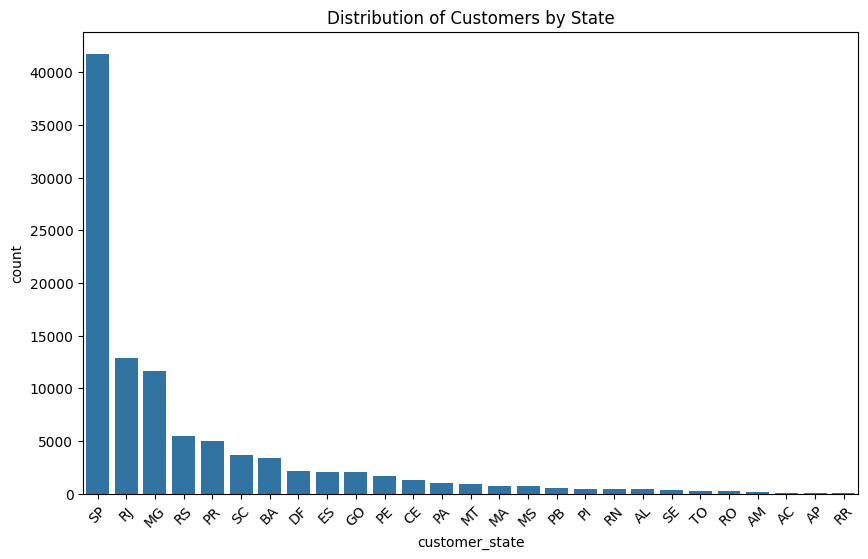

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='customer_state', order=customers['customer_state'].value_counts().index)
plt.title('Distribution of Customers by State')
plt.xticks(rotation=45)
plt.show()

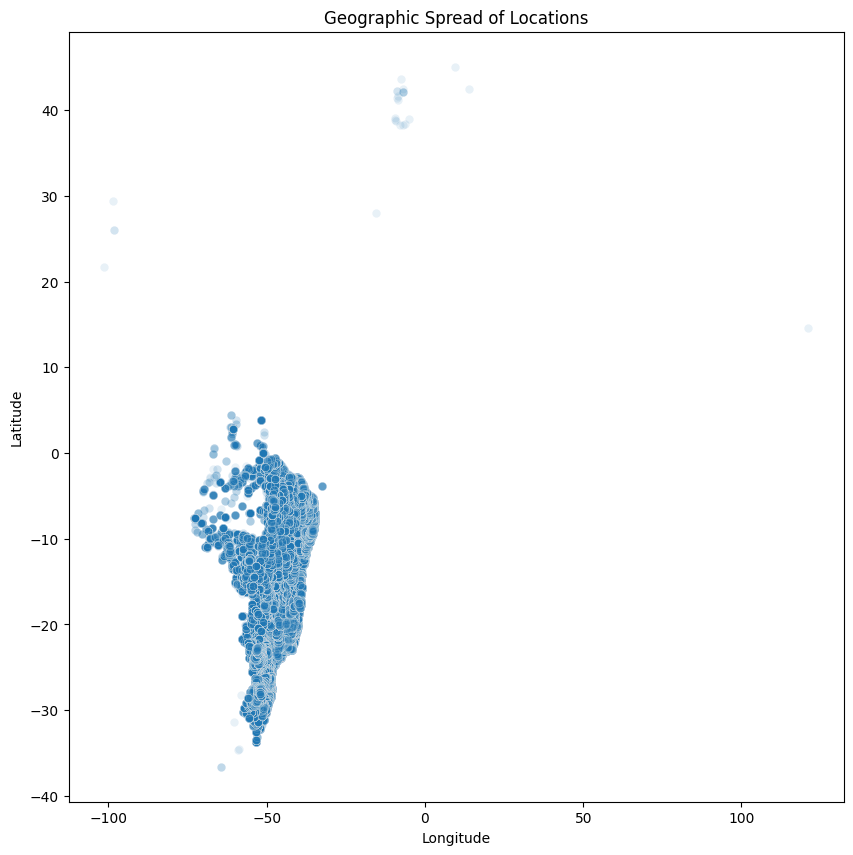

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=geolocation, x='geolocation_lng', y='geolocation_lat', alpha=0.1)
plt.title('Geographic Spread of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Insight:**
- Mengetahui pola, hubungan, dan distribusi di setiap dataset


## Visualization & Explanatory Analysis

### Pertanyaan 1: Tipe pelanggan apa yang perlu difokuskan untuk menningkatkan penjualan?

In [9]:
import datetime as dt

# Menggabungkan dataset Orders dengan Order Items untuk mendapatkan total pengeluaran
merged_data = pd.merge(orders, order_items, on='order_id')

# Konversi kolom waktu ke tipe datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Menentukan tanggal referensi (misalnya, hari terakhir dalam dataset + 1 hari)
reference_date = merged_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Menghitung Recency, Frequency, Monetary untuk setiap customer
rfm = merged_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Memberikan skor R, F, dan M
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]) # Changed line
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])


# Menggabungkan skor R, F, dan M untuk mendapatkan skor RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Menampilkan hasil
print(rfm.head())


                        customer_id  Recency  Frequency  Monetary R_Score  \
0  00012a2ce6f8dcda20d059ce98491703      288          1     89.80       2   
1  000161a058600d5901f007fab4c27140      410          1     54.90       1   
2  0001fd6190edaaf884bcaf3d49edf079      548          1    179.99       1   
3  0002414f95344307404f0ace7a26f1d5      379          1    149.90       1   
4  000379cdec625522490c315e70c7a9fb      150          1     93.00       3   

  F_Score M_Score RFM_Score  
0       1       3       213  
1       1       2       112  
2       1       4       114  
3       1       3       113  
4       1       3       313  


<ipython-input-10-1335570c9051>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()


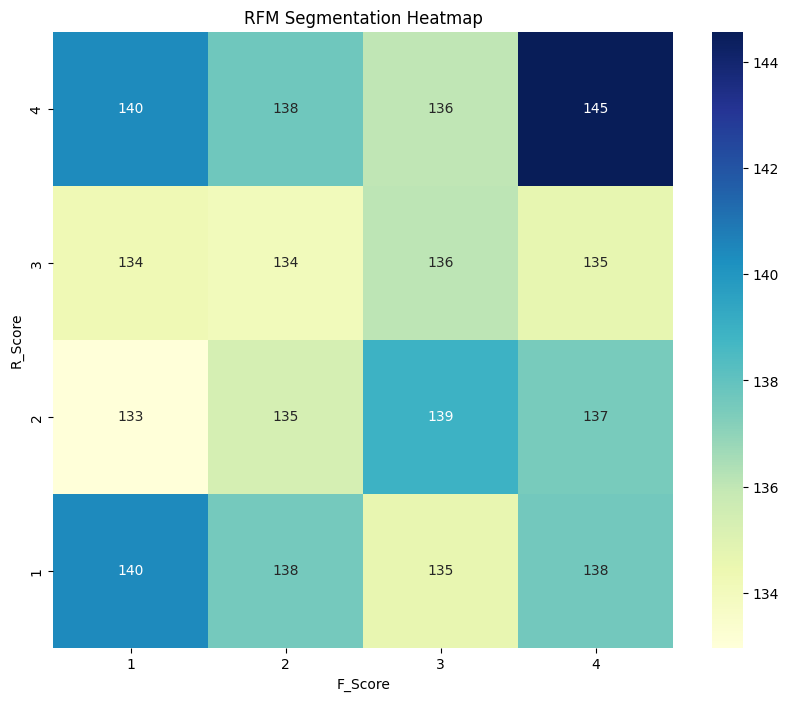

In [10]:
import numpy as np

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=range(4, 0, -1))
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=range(1, 5))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=range(1, 5))
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('RFM Segmentation Heatmap')
plt.show()


**Insight**

Melihat hubungan antara recency, frekuensi, dan nilai moneter rata-rata. Skor frekuensi tinggi dan recency rendah (kiri atas) biasanya menunjukkan pelanggan setia yang merupakan pembeli baru dan sering.


### Pertanyaan 2: Bagaimana menentukan fokus sales/promosi/ekspansi berdasarkan lokasi geografis pelanggan dan penjual?

In [11]:
# Merge customers with geolocation
customers_geo = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Merge sellers with geolocation
sellers_geo = pd.merge(sellers, geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

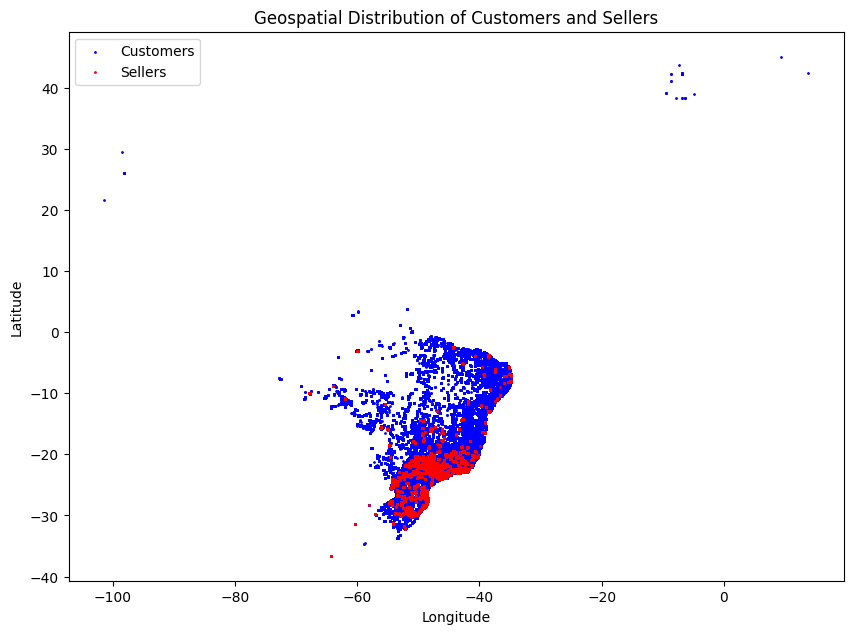

In [12]:
# Convert to GeoDataFrame
customers_gdf = gpd.GeoDataFrame(customers_geo, geometry=gpd.points_from_xy(customers_geo.geolocation_lng, customers_geo.geolocation_lat))
sellers_gdf = gpd.GeoDataFrame(sellers_geo, geometry=gpd.points_from_xy(sellers_geo.geolocation_lng, sellers_geo.geolocation_lat))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
customers_gdf.plot(ax=ax, markersize=1, color='blue', label='Customers')
sellers_gdf.plot(ax=ax, markersize=1, color='red', label='Sellers')

plt.legend()
plt.title('Geospatial Distribution of Customers and Sellers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insight:**

1. Penjual terkonsentrasi di wilayah tenggara Brasil, sementara pelanggan lebih tersebar luas, terutama di wilayah utara dan barat laut. Hal ini menunjukkan pusat ekonomi utama dan potensi kesenjangan distribusi.

2. Wilayah dengan banyak pelanggan tapi sedikit penjual, terutama di luar pusat kota besar, menawarkan peluang ekspansi bisnis dan peningkatan logistik untuk mengurangi waktu pengiriman dan biaya.

## Analisis Lanjutan (Opsional)

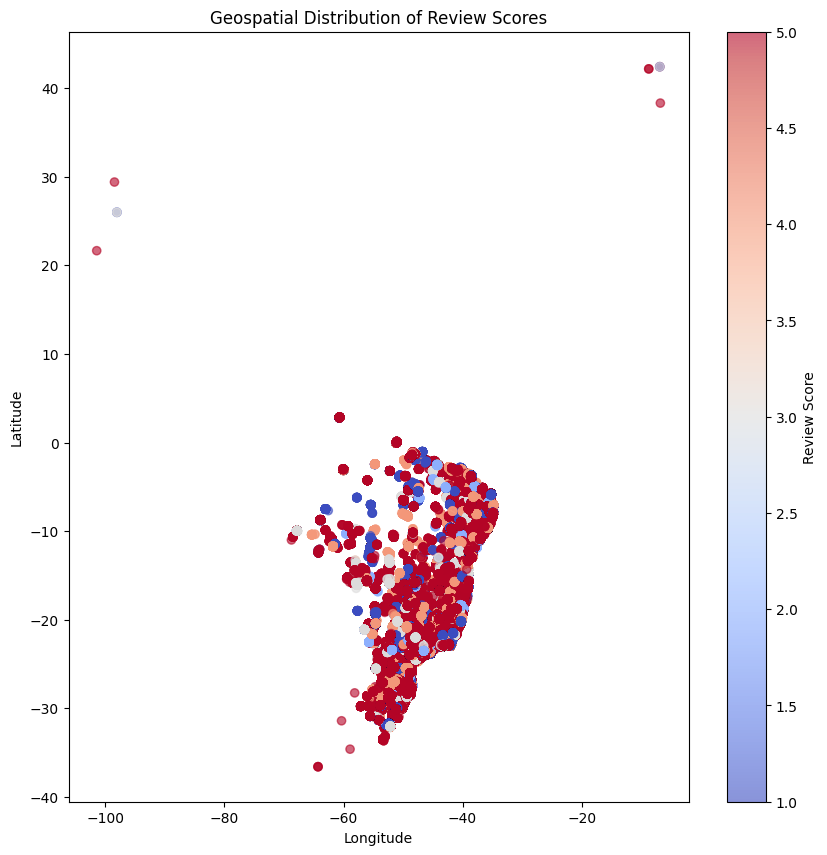

In [13]:
# Merge reviews with orders and customers data
reviews_geo = pd.merge(reviews, orders, on='order_id')
reviews_geo = pd.merge(reviews_geo, customers_geo, on='customer_id')

# Plot review scores based on geolocation
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(reviews_geo['geolocation_lng'], reviews_geo['geolocation_lat'], c=reviews_geo['review_score'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Review Score')
plt.title('Geospatial Distribution of Review Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insight**

Jika dibandingkan dengan hasil visualisasi geospatial, rating rendah berasal dari daerah yang memiliki seller lebih sedikit. Meskipun terdapat faktor lain yang mempengaruhi, tetapi ketersediaan seller kemungkinan mempengaruhi kepuasan pelanggan.

## Conclusion

- Conclution pertanyaan 1

Pelanggan yang perlu difokuskan untuk meningkatkan penjualan adalah mereka dengan nilai F (Frequency) dan R (Recency) yang tinggi, berdasarkan heatmap RFM. Pelanggan di segmen ini sering berbelanja dan baru saja melakukan transaksi, menunjukkan loyalitas tinggi dan potensi nilai yang besar. Upaya seperti program loyalitas, diskon eksklusif, atau penawaran khusus dapat membantu mempertahankan mereka, sementara pelanggan dengan frekuensi tinggi tapi waktu pembelian terakhir yang lama dapat ditargetkan dengan kampanye reaktivasi.

- Conclution pertanyaan 2

Untuk fokus sales, promosi, atau ekspansi, analisis penyebaran geografis menunjukkan bahwa wilayah dengan konsentrasi titik merah, yang mungkin mewakili pelanggan, adalah area utama untuk promosi. Fokuskan aktivitas penjualan di area ini untuk memaksimalkan potensi penjualan. Di sisi lain, area dengan sedikit titik dapat dipertimbangkan untuk strategi ekspansi, karena ada potensi pasar yang belum tergarap di sana.